# PROJET : <font color='red'> **COUVERTURE DE GRAPHE** </font>
BINOME : <br>
ABITBOL Yossef 3804139 <br>
         SERRAF  Dan    3971120

## IMPORT 


In [6]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx
import pickle

In [7]:
################### PICKLE ######################
def sauvegardeFichier(nomFichier,obj):
    with open(nomFichier,'wb') as fichier :
        enregistre = pickle.Pickler(fichier)
        enregistre.dump(obj)

def lectureFichier(nomFichier):
    with open(nomFichier,'rb') as fichier :
        recupere = pickle.Unpickler(fichier)
        return recupere.load()

Un graphe sera représenté par un **dictionnaire** , dont les clés correspondent aux sommets et les valeurs, representées par des listes aux sommets adjacents. <br>


#  <font color='red'> 1. CREATION DE GRAPHE A PARTIR D'UN FICHIER .txt </font>

In [8]:
def fichier_to_graphe(chemin_fichier):
    """ 
    str -> dict{int : list[int]} 
    ce fichier permet de transformer un fichier texte en un graphe
    """
    graphe = dict() 
    # on ouvre le fichier 
    fichier = open(chemin_fichier,'r').read().splitlines()
    
    # 1 / nombre de sommets 
    fichier = fichier[1:] # supprime le texte 'Nombre de sommets'

    nb_sommets = int(fichier[0]) # nombre de sommets
    
    # 2 / les sommet 
    fichier = fichier[2:] # Supprime le texte 'sommets' et la valeur du nombre de sommet
    for i in range(nb_sommets) :
        graphe[int(fichier[i])] = []

    fichier = fichier[1 + nb_sommets:] # Supprime le texte 'nombre d arrete' et la valeur des differents sommets
    
    # 3 / nombre d'arretes
    nb_aretes = int(fichier[0]) # nombre d aretes
    fichier = fichier[2:] # Supprime le texte 'arete' et la valeur du nombre d arrete
     
    # 4 / les aretes 
    for i in range(nb_aretes) :
        arete = fichier[i].split()
        graphe[int(arete[0])].append(int(arete[1]))
        graphe[int(arete[1])].append(int(arete[0]))
        
    return graphe

In [9]:
f = './exempleinstance.txt'
graphe = fichier_to_graphe(f)
print(f" Le graphe issu du fichier {f} est le suivant : \n {graphe} \n Les sommets : \n {list(graphe.keys())} \n les sommets incidents : \n {list(graphe.values())}")

 Le graphe issu du fichier ./exempleinstance.txt est le suivant : 
 {0: [5, 4, 2], 1: [2, 3, 4], 2: [1, 0], 3: [1, 5], 4: [0, 1, 5], 5: [0, 3, 4, 6], 6: [5]} 
 Les sommets : 
 [0, 1, 2, 3, 4, 5, 6] 
 les sommets incidents : 
 [[5, 4, 2], [2, 3, 4], [1, 0], [1, 5], [0, 1, 5], [0, 3, 4, 6], [5]]


 les aretes du graphe : 
[(0, 5), (0, 4), (0, 2), (1, 2), (1, 3), (1, 4), (3, 5), (4, 5), (5, 6)]


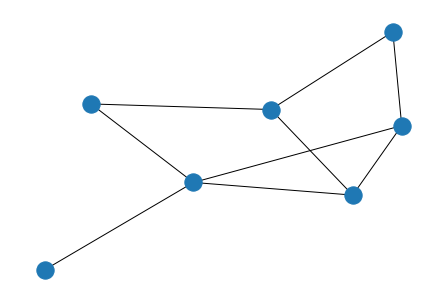

In [10]:
def dessineGraphe(graphe): 
    """
    dict{int:list[int]} 
    cette fonction permet de dessiner un graphe 
    """
    G = nx.Graph()
    liste = []
    for i in graphe : 
        for j in graphe[i] : 
            if (j,i) not in liste :
                liste.append((i,j)) 
    print(f" les aretes du graphe : \n{liste}")
    G.add_edges_from(liste)
    nx.draw(G) # default spring_layout

dessineGraphe(graphe)

# <font color='red'>2. GRAPHES</font>

## 2.1 | OPERATIONS DE BASE 

### 1) Suppresion d'un sommet

In [11]:
def supprimeSommet(graphe,sommet):
    """
    dict{int : list[int]} * int -> dict{int : list[int]} 
    Cette fonction prend en parametre un graphe G et un sommet v de G, et retourne le graphe G' 
    obtenu après la suppression du sommet et de ses aretes incidentes
    """
    # crée un nouvel objet identique au premier mais qui sont totalement distincts.
    graphe2 = copy.deepcopy(graphe)
    for i in graphe2[sommet] :
        if len(graphe2[i]) == 1 : # cas ou il reste 1 arete dans un sommet 
            graphe2[i].remove(sommet)
            del graphe2[i]
        else:
            graphe2[i].remove(sommet)
    del graphe2[sommet]
        
    return graphe2

 Le graphe de base est le suivant : 
 {0: [3, 6], 3: [0, 8], 6: [0, 8], 8: [3, 6]} 
 on va supprimer le sommet : 3 
 on obtient donc : 
 {0: [6], 6: [0, 8], 8: [6]}
 les aretes du graphe : 
[(0, 6), (6, 8)]


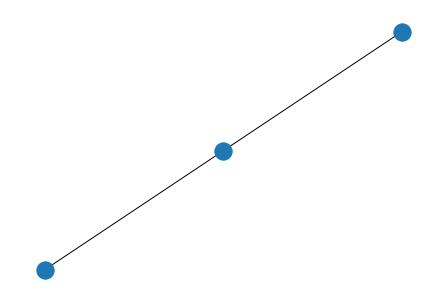

In [12]:
# TEST 
S = 3
graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
graphe2 = supprimeSommet(graphe,S)
print(f" Le graphe de base est le suivant : \n {graphe} \n on va supprimer le sommet : {S} \n on obtient donc : \n {graphe2}")
dessineGraphe(graphe2)

### 2) Suppression d'une liste de sommet

In [13]:
def supprimeListeSommet(graphe,listeS):
    """
    dict{int : list[int]} * list[int] -> dict{int : list[int]}
    On generalise le cas de la suppresion d'un sommet a une liste de sommets
    """
    graphe2 = copy.deepcopy(graphe)
    for sommet in listeS :
        graphe2 = supprimeSommet(graphe2,sommet)
    return graphe2

 Le graphe de base est le suivant : 
 {0: [3, 6], 3: [0, 8], 6: [0, 8], 8: [3, 6]} 
 on va supprimer la liste de sommets : [0, 6] 
 on obtient donc : 
 {3: [8], 8: [3]}
 les aretes du graphe : 
[(3, 8)]


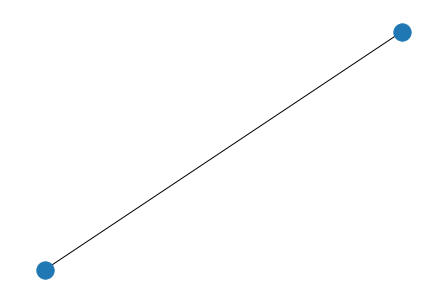

In [14]:
# TEST 
listeS = [0,6]
graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
graphe2 = supprimeListeSommet(graphe,listeS)
print(f" Le graphe de base est le suivant : \n {graphe} \n on va supprimer la liste de sommets : {listeS} \n on obtient donc : \n {graphe2}")
dessineGraphe(graphe2)

### 3) Degrés du graphe 

In [15]:
def degreSommet(graphe):
    '''
    dict(int:list[int]) ->  dict(int:int)
    cette fonction renvoi le degre pour chaque sommet 
    '''
    degre = dict()
    for i in graphe :
        degre[i] = len(graphe[i])
    return degre

def degreMaximum(degre):
    '''
    dict(int:int) -> int 
    cette fonction renvoi le sommet avec le degre max 
    '''
    sommet = -1
    maxi = -1 
    for i in degre :
        if degre[i] > maxi :
            maxi = degre[i]
            sommet = i
    return sommet

 les aretes du graphe : 
[(0, 3), (0, 6), (3, 8), (6, 8)]
 Les degres des differents sommets du graphe : 
 {0: [3, 6], 3: [0, 8], 6: [0, 8], 8: [3, 6]} 
 sont : 
 {0: 2, 3: 2, 6: 2, 8: 2} 
 et le sommet avec le degre max est : 0


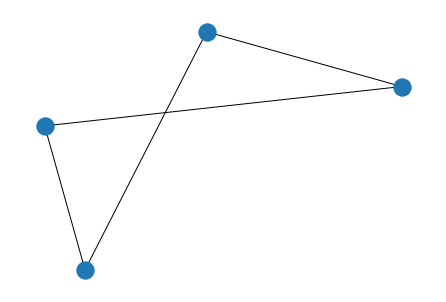

In [16]:
# TEST
graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
dessineGraphe(graphe)
degrer = degreSommet(graphe)
sommet_max = degreMaximum(degrer)
print(f" Les degres des differents sommets du graphe : \n {graphe} \n sont : \n {degrer} \n et le sommet avec le degre max est : {sommet_max}")

## 2.2 | Generations d'instances 

In [27]:
def genererGrapheSansSommetVide(graphe):
    """
    dict{int : list[int]} -> dict{int : list[int]}
    cette fonction renvoi un graphe en supprimant les sommets sans aretes 
    """
    graphe2 = copy.deepcopy(graphe)
    for i in graphe2 : 
        if len(graphe2[i]) == 0 : 
            graphe2 = supprimeSommet (graphe2,i)
    return graphe2

In [28]:
def genererGraphe(n,p):
    '''
    int * float -> dict{int:list[int]}
    prend en parametre un entier n qui est le nombre de sommets et p la probabilite de la presence d'une aretes(sommet incident) 
    et genere un graphe aleatoire 
    '''
    if n < 0 :
        raise ValueError ( 'n doit etre > 0' )
    if p >= 1 or p <= 0 :
        raise ValueError ( 'p doit appartenir a ]0,1[')

    graphe = dict()
    for i in range(n):
        graphe[i] = []

    for i in range(n) :
        for j in range(i,n) :
            if p > np.random.rand() and i != j :
                graphe[i].append(j)
                graphe[j].append(i)
                
    return genererGrapheSansSommetVide(graphe)

 On genere aleatoirement un graphe de 5 sommets et de proba 0.4. On obtient : 
 {1: [3], 3: [1, 4], 4: [3]}
 les aretes du graphe : 
[(1, 3), (3, 4)]


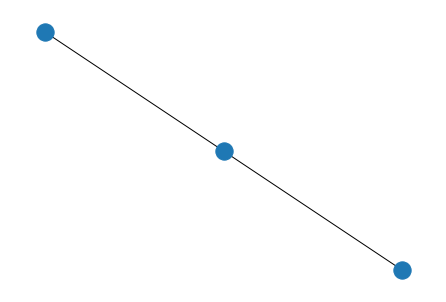

In [29]:
# TEST 
n = 5
p = 0.4
G = genererGraphe(n,p)
print(f" On genere aleatoirement un graphe de {n} sommets et de proba {p}. On obtient : \n {G}" )
dessineGraphe(G)

 On genere aleatoirement un graphe de 5 sommets et de proba 0.2. On obtient : 
 {0: [1, 4], 1: [0, 2], 2: [1, 3, 4], 3: [2], 4: [0, 2]} 
 on supp les sommets vide :
{0: [1, 4], 1: [0, 2], 2: [1, 3, 4], 3: [2], 4: [0, 2]}
 les aretes du graphe : 
[(0, 1), (0, 4), (1, 2), (2, 3), (2, 4)]


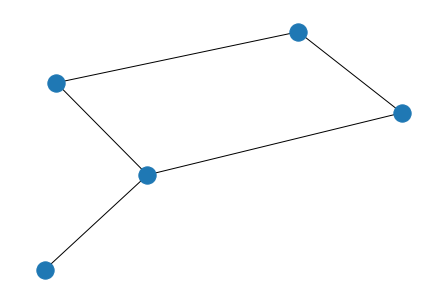

In [30]:
# TEST 
n = 5
p = 0.2
G = genererGraphe(n,p)
G2 = genererGrapheSansSommetVide(G)
print(f" On genere aleatoirement un graphe de {n} sommets et de proba {p}. On obtient : \n {G} \n on supp les sommets vide :" )
print(G2)
dessineGraphe(G2)

# <font color='red'> 3. METHODES APPROCHEES</font>

## ALGO COUPLAGE

In [31]:
def algoCouplage(graphe):
    """
    dict{ int : list[int] } -> list[int]
    cette fonction renvoi un couplage qui est un ensemble d’aretes n’ayant pas d’extremite en commun.
    """
    couverture = [] #C = emptyset
    for i in graphe :
        for j in graphe[i] :
            if i not in couverture and j not in couverture: #Si aucune des deux extremites de e_i n’est dans C,
                #Ajouter les deux extremites de e_i a C
                couverture.append(i)
                couverture.append(j)
    return couverture #C

 La couverture renvoyé par l'algo de couplage est le suivant : 
 [0, 3, 6, 8]
 les aretes du graphe : 
[(0, 3), (0, 6), (3, 8), (6, 8)]


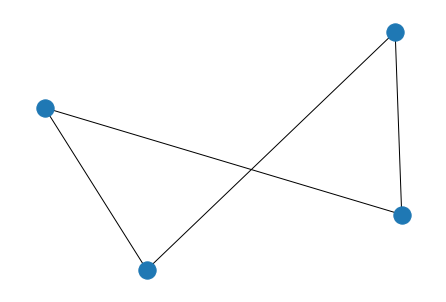

In [32]:
# TEST
graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
#graphe = {}
couverture = algoCouplage(graphe)
print(f" La couverture renvoyé par l'algo de couplage est le suivant : \n {couverture}")
dessineGraphe(graphe)

## ALGO GLOUTON

In [33]:
def algoGlouton(graphe):
    """
    dict{ int : list[int] } -> list[int]
    cette fonction renvoi une couverture en choisissant a chaque fois le sommet avec le degre max 
    """
    couverture = [] # C = emptyset
    graphe2 = copy.deepcopy(graphe)
    while graphe2 : # Tant que E n’est pas vide:
        sommet  = degreMaximum(degreSommet(graphe2)) # Prendre un sommet v de degre maximum
        couverture.append(sommet) # Ajouter v a C,
        graphe2 = supprimeSommet(graphe2,sommet)
    return couverture # Renvoyer C

 La couverture renvoyé par l'algo glouton est le suivant : 
 [0, 8]
 les aretes du graphe : 
[(0, 3), (0, 6), (3, 8), (6, 8)]


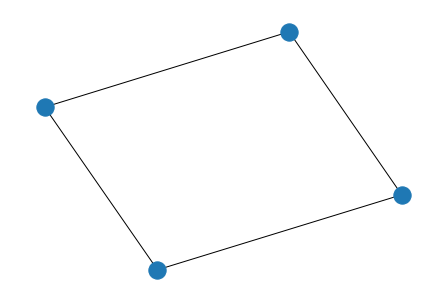

In [34]:
#TEST 
graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
#graphe = {}
couverture = algoGlouton(graphe)
print(f" La couverture renvoyé par l'algo glouton est le suivant : \n {couverture}")
dessineGraphe(graphe)

# <font color='red'> 4. SEPARATION ET EVALUATION </font>

## Fonctions preliminaires 

In [20]:
############################## FONCTIONS IMPORTANTES AUX ALGOS DE BRANCHEMENT ##############################

In [36]:
def init_branchement(graphe):
    """
        dict{int: list[int]} -> list[int] * int * int *list[list[dict{int : list[int]} , list[int] , list[int]]] * int * int
        cette fonction permet d'initialiser la premiere etape du graphe, init la couverture , choisir la premiere arete, init le nb de noeud..
    """
    couverture = []  
    # selection u_v
    u= list(graphe.keys())[0]
    v = graphe[u][0]
    pile = [ [graphe,[],[u]] , [graphe,[],[v] ] ] # on utilise la methode de pile pour resoudre branchement
    nb_noeud = 0
    borne_sup = - np.inf 
    return  couverture,u,v,pile,nb_noeud,borne_sup

def update_branchement(pile,nb_noeud):
    """
    list[list[dict{int : list[int]} , list[int] , list[int]]] * int -> int * dict{int: list[int]} * list[int]
    met a jour le nombre de noeud, le graphe en supprimant les sommets/aretes incidents et la couverture 
    """
    courant = pile.pop() # on enleve l'element en tete de la pile 
    nb_noeud += 1 
    # courant[0]=graphe, courant[1]=[], courant[2]=[u]
    graphe1 = supprimeListeSommet(courant[0],courant[2])
    couverture1 = courant[1] + courant[2]
    return nb_noeud,graphe1,couverture1

def update_pile(graphe1,couverture1,u,v,pile):
    """
    dict{int: list[int]} * list[int] * int * int * list[list[dict{int : list[int]} , list[int] , list[int]]] -> list[list[dict{int : list[int]} , list[int] , list[int]]]
    on met a jour la pile en lui rajoutant a la fin de la liste les sommets u et v 
    """
    pile.append([graphe1,couverture1, u])
    pile.append([graphe1,couverture1, v])
    return pile

def selection_u_v(graphe1):
    """ 
    dict{int: list[int]} -> int * int 
    fonction qui choisis la premiere arete et renvoi les sommets u et v 
    """
    u= list(graphe1.keys())[0]
    v = graphe1[u][0]
    return u,v

def calculeLongeur(graphe):
    """
    dict[int : list[int] ] -> int
    renvoi le nombre d'aretes 
    """
    cpt = 0
    for g in graphe: 
        cpt += len(graphe[g])
    return cpt /2 # car symetrie des aretes

## 4.1) BRANCHEMENT SIMPLE

On va d'abord voir un premier algorithme de **branchement simple**. Le branchement considéré ici est le suivant : prendre une arête e = {u, v}, et considérer deux cas : soit u est dans la couverture, soit v est dans la couverture.

In [37]:
def branchement_(graphe):
    """
    dict{int:list[int]} -> list[int] * int
    """
    if (len(graphe)) == 0 : 
        return [],0
    couverture,u,v,pile,nb_noeud,_ = init_branchement(graphe) #initialisation des elements necessaires au branchement   

    while pile != []: # tant que la pile n'est pas vide 
        nb_noeud,graphe1,couverture1 = update_branchement(pile,nb_noeud) # on met a jour les elements 
        #cas de base 
        if calculeLongeur(graphe1) == 0: # quand t'es a une feuille 
            if  len(couverture1) < len(couverture) or len(couverture) == 0 : # on met a jour la meilleure couverture 
                couverture = couverture1
        else:
            u,v = selection_u_v(graphe1) # on choisit la nouvelle arete 
            pile = update_pile(graphe1,couverture1,[u],[v],pile) # on met a jour la pile
    return couverture, nb_noeud # on renvoi la meilleure couverture et le nombre de noeud generes 

 La couverture renvoyé par l'algo branchement simple est le suivant : 
 [3, 6] 
 avec 10 noeuds generes
 les aretes du graphe : 
[(0, 3), (0, 6), (3, 8), (6, 8)]


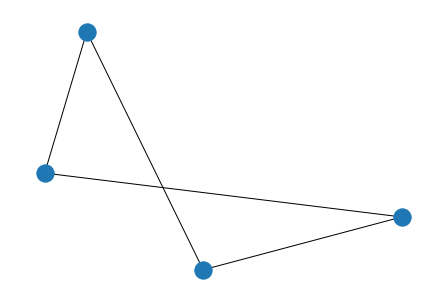

In [38]:
#TEST 
#graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
#graphe = {}
couverture , nb_noeud = branchement_(graphe)
print(f" La couverture renvoyé par l'algo branchement simple est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")
dessineGraphe(graphe)

## 4.2) AJOUT DES BORNES

### - Calcul des bornes 

In [43]:
def calculeB1(graphe,m):
    """
    dict{int : list[int]} * int -> int 
    """
    if len(graphe) == 0 :
        return 0
    delta = len(graphe[degreMaximum(degreSommet(graphe))])
    if(delta !=0):  
        return np.ceil(m/delta) # partie_entiere( m / degre_max )  
    return 0

def calculeB3(n,m):
    """
    int * int -> int 
    """
    return ((2*n - 1 - (((2*n - 1)**2 - 8*m )**(1/2)))/2) 
##############  COUPLAGE  ############## 
def calculeB2(graphe):
    """
    dict{int : list[int]} -> int 
    """
    return len(algoCouplage(graphe)) /2 # solution de l'algo couplage


def calculeBorneInferieur(graphe):
    """
    dict{int:list[int]} -> int * int * int 
    cette fonction calcul la borne inferieur avec l'algo de Couplage
    """
    n = len(graphe)
    m = calculeLongeur(graphe)
    b1 = calculeB1(graphe,m)  
    b2= calculeB2(graphe)
    b3=calculeB3(n,m)
    return (b1,b2,b3)

def testBorneInferieur(graphe,couverture):
    """
    dict{int:list[int]} * list[int] -> bool
    test de la borne inf avec l'algo Couplage
    """
    return np.max(calculeBorneInferieur(graphe)) <= len(couverture)

##############  GLOUTON  ##############
def calculeB2_2(graphe):
    """
    dict{int : list[int]} -> int 
    """
    return len(algoGlouton(graphe)) /2 # solution de l'algo glouton 

def calculeBorneInferieur2(graphe):
    """
    dict{int:list[int]} -> int * int * int 
    cette fonction calcul la borne inferieur avec l'algo Glouton 
    """
    n = len(graphe)
    m = calculeLongeur(graphe)
    b1 = calculeB1(graphe,m)  
    b2= calculeB2_2(graphe)
    b3=calculeB3(n,m)
    return (b1,b2,b3)

def testBorneInferieur2(graphe,couverture):
    """
    dict{int:list[int]} * list[int] -> bool
    test de la borne inf avec l'algo Glouton 
    """
    return np.max(calculeBorneInferieur2(graphe)) <= len(couverture)

In [44]:
#TEST 
graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
borne_inf = calculeBorneInferieur(graphe)
print(f"La borne inf (couplage) est : {borne_inf}")
test_borne_inf = testBorneInferieur(graphe,couverture)
print(f"Est ce bien une borne inf ? : {test_borne_inf}")

graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
borne_inf = calculeBorneInferieur2(graphe)
print(f"La borne inf (glouton) est : {borne_inf}")
test_borne_inf = testBorneInferieur2(graphe,couverture)
print(f"Est ce bien une borne inf ? : {test_borne_inf}")

La borne inf (couplage) est : (2.0, 2.0, 1.4384471871911697)
Est ce bien une borne inf ? : True
La borne inf (glouton) est : (2.0, 1.0, 1.4384471871911697)
Est ce bien une borne inf ? : True


### - Amelioration de branchement avec la methode des bornes

On va ameliorer le branchement simple par le calcul (en chaque nœud) d’une **solution réalisable** obtenue avec l’algorithme de couplage / glouton et le calcul d’une **borne inferieure** basée sur la relation précédente.

In [45]:
graphe = genererGrapheSansSommetVide(genererGraphe(8,0.6)) # meme graphe pour les tests

#### **Avec Couplage** : 

In [46]:
#4.2.2
def branchementBorneInfCouplage_(graphe):
    """
    dict{int : list[int]} -> list[int] * int
    calcul (en chaque nœud) d’une solution réalisable obtenue avec l’algorithme de couplage et la methodes des bornes 
    """
    if (len(graphe)) == 0 : 
        return [],0
    couverture,u,v,pile,nb_noeud,borne_sup = init_branchement(graphe)  #initialisation de elements necessaires
    while pile != []: # tant que la pile n'est pas vide 
        nb_noeud,graphe1,couverture1 = update_branchement(pile,nb_noeud) # mise a jour du nb de noeud, graphe et de la couverture 
        borne_inf = np.max(calculeBorneInferieur(graphe1)) # on calcule la borne inf 
        # test sur borne inf et borne sup 
        if borne_inf == 0: #feuille
            if borne_sup < 0 or len(couverture1) < borne_sup: 
                couverture = couverture1 #update couverture 
                borne_sup = len(couverture)  
            continue

        if borne_sup > 0 and (len(couverture1) + borne_inf >= borne_sup): # le noeud n'a pas de meilleur solution
            continue
        # calcul de la couverture a chaque noeud 
        couverture2 = algoCouplage(graphe1) 
        
        if len(couverture2) == borne_inf:
            couverture = list(set(couverture1 + couverture2))
            borne_sup = len(couverture)

        else:
            u,v = selection_u_v(graphe1) # on prend la premiere arete 
            pile = update_pile(graphe1,couverture1,[u],[v],pile) #mise a jour de la pile 
    return couverture, nb_noeud

In [47]:
#TEST
couverture , nb_noeud = branchementBorneInfCouplage_(graphe)
print(f" La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Couplage est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

 La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Couplage est le suivant : 
 [0, 3, 4, 7] 
 avec 18 noeuds generes


#### **Avec Glouton** : 

In [49]:
#4.2.3
def branchementBorneInfGlouton_(graphe):
    """
    dict{int : list[int]} -> list[int] * int
    calcul (en chaque nœud) d’une solution réalisable obtenue avec l’algorithme de Glouton et la methodes des bornes 
    """
    if (len(graphe)) == 0 : 
        return [],0
    couverture,u,v,pile,nb_noeud,borne_sup = init_branchement(graphe) 

    while pile != []:

        nb_noeud,graphe1,couverture1 = update_branchement(pile,nb_noeud)
        borne_inf = np.max(calculeBorneInferieur(graphe1))
        
        if borne_inf == 0:
            if borne_sup < 0 or len(couverture1) < borne_sup:
                couverture = couverture1
                borne_sup = len(couverture)
            continue

        if borne_sup > 0 and (len(couverture1) + borne_inf >= borne_sup): continue

        couverture2 = algoGlouton(graphe1)
        
        if len(couverture2) == borne_inf:
            couverture = list(couverture1 + couverture2)
            borne_sup = len(couverture)
        else:
            u,v = selection_u_v(graphe1)
            pile = update_pile(graphe1,couverture1,[u],[v],pile)
    return couverture, nb_noeud

In [50]:
#TEST
couverture , nb_noeud = branchementBorneInfGlouton_(graphe)
print(f" La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Glouton est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

 La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Glouton est le suivant : 
 [0, 3, 4, 7] 
 avec 4 noeuds generes


## 4.3) AMELIORATIONS DE BRANCHEMENT 

### -------------------------- 1er amelioration --------------------------

Lorsque l’on branche sur une arete e = {u, v}, dans la deuxième branche où l’on prend le sommet
v dans la couverture, on peut supposer que **l’on ne prend pas le sommet u**. Dans la 2ème branche, ne prenant pas u dans la couverture on doit alors prendre tous les voisins de u (et on peut les supprimer du graphe donc).

In [52]:
#4.3.1
def branchementAmeliorer_(graphe):
    """
    dict{int:list[int]} -> list[int] * int
    amelioration de branchement en supprimant u et les sommets incidents de u dans la branche de v  
    """
    if (len(graphe)) == 0 : 
        return [],0
    couverture,u,v,pile,nb_noeud,borne_sup = init_branchement(graphe) 
    
    while pile != []:
        nb_noeud,graphe1,couverture1 = update_branchement(pile,nb_noeud)
        borne_inf = np.max(calculeBorneInferieur(graphe1))
        if borne_inf == 0:
            if borne_sup < 0 or len(couverture1) < borne_sup:
                couverture = couverture1
                borne_sup = len(couverture)
            continue

        if borne_sup > 0 and len(couverture1) + borne_inf >= borne_sup:
            continue
        couverture2 = algoCouplage(graphe1)
        if len(couverture2) == borne_inf :
            couverture = list(couverture1 + couverture2)
            borne_sup = len(couverture)

        else:
            u = list(graphe1.keys())[0]
            sommet_incident = []
            for i in graphe1[u]:
                sommet_incident.append(i)
            pile = update_pile(graphe1,couverture1,[u],sommet_incident,pile)
      
    return couverture, nb_noeud

In [53]:
#TEST 
#graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
#graphe = genererGrapheSansSommetVide(genererGraphe(12,0.6))
couverture , nb_noeud = branchementAmeliorer_(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 1 est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

 La couverture renvoyé par l'algo branchement ameliore 1 est le suivant : 
 [5, 0, 1] 
 avec 8 noeuds generes


### -------------------------- 2e amelioration --------------------------

Afin d’éliminer un maximum de sommets dans la deuxième branche, il semble intéressant de
choisir le branchement de manière à ce que le sommet **u soit de degré maximum dans le graphe
restant**.

In [54]:
def selection_u_v_ameliorer(graphe1): 
    """
    dict{int:list[int]} -> int * int 
    on choisis les sommets u et v tel que u est de degre maximum
    """
    u = degreMaximum(degreSommet(graphe1))
    v = []
    for i in graphe1[u]:
        v.append(i)
    return u,v

In [55]:
#4.3.2
def branchementAmeliorer_2(graphe):
    """
    dict{int:list[int]} -> list[int] * int
    amelioration de branchement en choisissant u tel que u est le degre max 
    """
    if (len(graphe)) == 0 : 
        return [],0
    couverture,u,v,pile,nb_noeud,borne_sup = init_branchement(graphe) 
   
    while pile != []:
        nb_noeud,graphe1,couverture1 = update_branchement(pile,nb_noeud)
        borne_inf = np.max(calculeBorneInferieur(graphe1))
        if borne_inf == 0:
            if borne_sup < 0 or len(couverture1) < borne_sup:
                couverture = couverture1
                borne_sup = len(couverture)
            continue

        if borne_sup > 0 and len(couverture1) + borne_inf >= borne_sup:
            continue
        couverture2 = algoCouplage(graphe1)
        if borne_inf == len(couverture2):
            couverture = list(couverture1 + couverture2)
            borne_sup = len(couverture)

        else:
            u,v = selection_u_v_ameliorer(graphe1) # amelioration, on choisis u tel que u est degre max 
            pile = update_pile(graphe1,couverture1,[u],v,pile)
      
    return couverture, nb_noeud

In [56]:
#TEST 
#graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
couverture , nb_noeud = branchementAmeliorer_2(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 2 avec le degre max est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

 La couverture renvoyé par l'algo branchement ameliore 2 avec le degre max est le suivant : 
 [5, 1, 0] 
 avec 6 noeuds generes


### -------------------------- 3e amelioration --------------------------

Dans un graphe G, si un sommet u est de degré 1, expliquer pourquoi il existe
toujours une couverture optimale qui ne contient pas u. Insérer alors ce test permettant de
**supprimer un sommet sans brancher.**

In [57]:
def degrer_egale1(degrer):
    """
    dict{int:int} -> int 
    permet de retourner tout les sommets de degre 1
    """
    for i in degrer:
        if degrer[i] == 1 :
            return i
    return -1

In [58]:
#4.3.3
def branchementAmeliorer_3(graphe):
    """
    dict{int:list[int]} -> list[int] * int
    amelioration de branchement on choisissant u tel que u est le degre max 
    """
    if (len(graphe)) == 0 : 
        return [],0
    couverture,u,v,pile,nb_noeud,borne_sup = init_branchement(graphe) 

    while pile != []:
        nb_noeud,graphe1,couverture1 = update_branchement(pile,nb_noeud)
        degre_sommet = degreSommet(graphe1) # on cherche tout les degre du graphe 
        u1 = degrer_egale1(degre_sommet) # on cherche les sommets de deg 1, les autres sommets sont mis  -1 
        while u1 != -1: 
            # on va chercher le sommet adjacent 
            voisin = graphe1[u1][0]
            graphe1 = supprimeSommet(graphe1,voisin) # on supprime le sommet 
            couverture1 = couverture1 + [voisin] # on ajoute le sommet a la couverture 
            degre_sommet = degreSommet(graphe1)
            u1 = degrer_egale1(degre_sommet)

        borne_inf = np.max(calculeBorneInferieur(graphe1))
        
        if borne_inf == 0:
            if len(couverture1) < borne_sup or borne_sup < 0 :
                couverture = couverture1
                borne_sup = len(couverture)
            continue

        if borne_sup > 0 and (len(couverture1) + borne_inf >= borne_sup): 
            continue

        couverture2 = algoCouplage(graphe1)

        if borne_inf == len(couverture2):
            couverture = list(couverture1 + couverture2)
            borne_sup = len(couverture)

        else:
            u,v = selection_u_v_ameliorer(graphe1) # u de degre max 
            pile = update_pile(graphe1,couverture1,[u],v,pile)
      
    return couverture, nb_noeud

In [59]:
#TEST 
#graphe = {0:[3,6], 3 : [0,8], 6 :[0,8], 8 : [3,6]}
couverture , nb_noeud = branchementAmeliorer_3(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 3 avec le degre max est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

 La couverture renvoyé par l'algo branchement ameliore 3 avec le degre max est le suivant : 
 [5, 1, 0] 
 avec 2 noeuds generes


# **------------------------------------------------------------------**

# ------------------ <font color ='red'>**TEST DES ALGORITHMES**</font> ------------------ 

# **------------------------------------------------------------------**

### TEST SUR UNE INSTANCE

In [39]:
#TEST 
# on test toute les fonctions sur une instance 

graphe = genererGrapheSansSommetVide(genererGraphe(12,0.3))

couverture , nb_noeud = branchement_(graphe)
print(f" La couverture renvoyé par l'algo branchement simple est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

couverture , nb_noeud = branchementBorneInfCouplage_(graphe)
print(f" La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Couplage est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

couverture , nb_noeud = branchementBorneInfGlouton_(graphe)
print(f" La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Glouton est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

couverture , nb_noeud = branchementAmeliorer_(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 1 est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

couverture , nb_noeud = branchementAmeliorer_2(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 2 avec le degre max est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

couverture , nb_noeud = branchementAmeliorer_3(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 3 avec le degre max est le suivant : \n {couverture} \n avec {nb_noeud} noeuds generes")

 La couverture renvoyé par l'algo branchement simple est le suivant : 
 [2, 3, 8, 10, 6, 7, 11] 
 avec 766 noeuds generes
 La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Couplage est le suivant : 
 [2, 3, 4, 6, 7, 8, 10] 
 avec 16 noeuds generes
 La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Glouton est le suivant : 
 [2, 3, 8, 10, 6, 7, 4] 
 avec 16 noeuds generes
 La couverture renvoyé par l'algo branchement ameliore 1 est le suivant : 
 [2, 3, 8, 10, 6, 7, 11] 
 avec 12 noeuds generes
 La couverture renvoyé par l'algo branchement ameliore 2 avec le degre max est le suivant : 
 [2, 3, 4, 7, 8, 10, 6] 
 avec 16 noeuds generes
 La couverture renvoyé par l'algo branchement ameliore 3 avec le degre max est le suivant : 
 [2, 10, 3, 8, 6, 7, 11] 
 avec 6 noeuds generes


# ----- Ensemble des fonctions exeperimentales -----

Pour tester nos algos, on a implémenté des fonctions qui font tout de maniere automatique. Pour cela, il suffit de leur donner les parametres necessaires. On obtient ainsi : les courbes du temps de calcul en fonction du nombre de sommet mais aussi en (log / n) et en (log / log), la qualite de l'algo, et le rapport entre les algos. 

## FONCTIONS UTILES AUX TESTS

In [73]:
def calcule_qualiter_temps_execution(listeListeGraphe,liste_fonction):
    temps_execution = []
    qualiter = []
    #Parcours les algos
    for i in np.arange(len(liste_fonction)):
        # calcule le temps d’exécution pour un algo en fonction des différents parametres
        resultat = []
        resultat2 = []
        
        #Parcours la liste de graphe chaque élément de cette liste est compose dans notre cas de 10 graphes de parametre n,p
        # On realise cette opération afin de pouvoir faire une moyenne sur les instances afins d’avoir des résultats les plus cohérents 
        for list_graphe in listeListeGraphe:
           
            temps = []
            temps2 = []
           
            # Parcours chaque graphe de parametre n,p de la liste_graphe
            for graphe in list_graphe :
                # Calcule le temps d’exécution pour un graphe pour une fonction
                debut = time.time()
                couverture = liste_fonction[i](graphe)
                fin = time.time()
                temps.append((fin - debut))
                temps2.append(len(couverture))
               
            resultat.append(np.mean(temps))
            resultat2.append(np.mean(temps2))
            
        temps_execution.append(resultat)
        qualiter.append(resultat2)
       
    return np.array(temps_execution),np.array(qualiter)

def calcule_qualiter_temps_execution2(listeListeGraphe,liste_fonction):
    temps_execution = []
    qualiter = []
    nb_noeud_total = []
    z = 0
    #Parcours les algos
    for i in np.arange(len(liste_fonction)):
        # calcule le temps d’exécution pour un algo en fonction des différents parametres
        resultat = []
        resultat2 = []
        resultat3 = []
        #Parcours la liste de graphe chaque élément de cette liste est compose dans notre cas de 10 graphes de parametre n,p
        # On realise cette opération afin de pouvoir faire une moyenne sur les instances afins d’avoir des résultats les plus cohérents 
        for list_graphe in listeListeGraphe:
            print(z)
            temps = []
            temps2 = []
            temps3 = []
            # Parcours chaque graphe de parametre n,p de la liste_graphe
            for graphe in list_graphe :
                # Calcule le temps d’exécution pour un graphe pour une fonction
                debut = time.time()
                if i == 0 :
                    couverture = liste_fonction[i](graphe)
                    nb_noeud = 0
                if i == 1:
                    couverture,nb_noeud = liste_fonction[i](graphe)
                fin = time.time()
                temps.append((fin - debut))
                temps2.append(len(couverture))
                temps3.append(nb_noeud)
            resultat.append(np.mean(temps))
            resultat2.append(np.mean(temps2))
            resultat3.append(np.mean(temps3))
            z +=1
           
        temps_execution.append(resultat)
        qualiter.append(resultat2)
        nb_noeud_total.append(resultat3)
    return np.array(temps_execution),np.array(qualiter),np.array(nb_noeud_total)
    
def graphique_comparaison(n_p,resultat_temps,P,nom_axeX,nom_axeY,nom_titre):
    
    val = int(len(n_p) / len(P))
    for i in range(1,len(P)+1):
       
        x = n_p[(i-1)*val:i*val,0]
        y = resultat_temps[(i-1)*val:i*val]
        plt.plot(x,y, label= ' p = ' + str(P[i-1]))

    plt.xlabel(nom_axeX)
    plt.ylabel(nom_axeY)
    plt.title(nom_titre)
    plt.legend()
    plt.show()

    coeff_directeur = []
   
    x = np.array(n_p)
    y = np.array(resultat_temps)
    for i in range(0,len(P)):
       
        deltaX = x[(i+1)*val-1] - x[i*val]
        deltaY = y[(i+1)*val-1] - y[i*val]
        coeff_directeur.append(deltaY/deltaX[0])
    return coeff_directeur

def graphique_passage_log(n_p,resultat_temps,P,nom_axeX,nom_axeY,nom_titre):
    x = np.array(n_p)
    y = np.log(np.array(resultat_temps))
    val = int(len(n_p) / len(P))
    graphique_comparaison(x,y,P,nom_axeX,nom_axeY,nom_titre)
    coeff_directeur = []
    
    for i in range(0,len(P)):
        deltaX = x[(i+1)*val-1] - x[i*val]
        deltaY = y[(i+1)*val-1] - y[i*val]
        coeff_directeur.append(deltaY/deltaX[0])
    return coeff_directeur

def graphique_passage_log_log(n_p,resultat_temps,P,nom_axeX,nom_axeY,nom_titre):
    x = np.log(np.array(n_p))
    y = np.log(np.array(resultat_temps))
    val = int(len(n_p) / len(P))
    graphique_comparaison(x,y,P,nom_axeX,nom_axeY,nom_titre)
    coeff_directeur = []
    
    for i in range(0,len(P)):
       
        deltaX = x[(i+1)*val-1] - x[i*val]
        deltaY = y[(i+1)*val-1] - y[i*val]
        coeff_directeur.append(deltaY/deltaX[0])
    return coeff_directeur


def parametre_grille_search(nmin,nmax,pas_n,pmin,pmax,pas_p):
    N = [i for i in np.arange(nmin,nmax,pas_n) ]
    P = [i for i in np.arange(pmin,pmax,pas_p)]
    return np.array([(n,p) for p in P for n in N ]),N,P

######
def parametre_grille_search_racine(nmin,nmax,pas_n,pmin,pmax,pas_p):
    N = [i for i in np.arange(nmin,nmax,pas_n) ]
    P = [1/(n**0.5) for i in np.arange(nmin,nmax,pas_n)]
    return np.array([(n,p) for p in P for n in N ]),N,P
######

def graphe_grille_search(n_p,iters=10):
    listeListeGraphe = []
    for n,p in n_p :
        temps = []
        for _ in np.arange(iters):
            temps.append(genererGrapheSansSommetVide(genererGraphe(int(n),p)))
        listeListeGraphe.append(temps)
    return np.array(listeListeGraphe)

def test_experimentale(n_p,P,iters,liste_fonction,nom_liste_fonction,dico_bool):
    listeListeGraphe = graphe_grille_search(n_p,iters)
    execution,qualiter = calcule_qualiter_temps_execution(listeListeGraphe,liste_fonction)
    nb_couverture = []
    coeff_directeur = []
    coeff_directeur_log = []
    coeff_directeur_log_log = []

    if dico_bool['execution'] :
        #Temps execution
        for i in np.arange(len(execution)):
            coeff_directeur.append((nom_liste_fonction[i],graphique_comparaison(n_p,execution[i],P,'Nombre de sommets','Temps en secondes','Algo ' + nom_liste_fonction[i] ))) 
            coeff_directeur_log.append((nom_liste_fonction[i],graphique_passage_log(n_p,execution[i],P,'Nombre de sommets','Temps en Log secondes','Algo ' + nom_liste_fonction[i] + ' Log')))
            coeff_directeur_log_log.append((nom_liste_fonction[i],graphique_passage_log_log(n_p,execution[i],P,'Nombre de Log sommets','Temps en Log secondes','Algo '+ nom_liste_fonction[i] +' Log-Log')))
    
    if dico_bool['nb_couverture'] :
        #Nombre de noeud 
        for i in np.arange(len(qualiter)):
            graphique_comparaison(n_p, qualiter[i] ,P,'Nombre de sommets','Nombre de noeud','Qualiter couverture ' + nom_liste_fonction[i])
            nb_couverture.append((nom_liste_fonction[i],qualiter[i]))
    
    
    if dico_bool['rapport'] :
        #Rapport entre fonction i / fonction j
        for i in np.arange(len(qualiter)):
            for j in np.arange(len(qualiter)):
                if i < j:
                    graphique_comparaison(n_p, qualiter[i] / qualiter[j] ,P,'Nombre de sommets',nom_liste_fonction[i] + ' / ' + nom_liste_fonction[j], nom_liste_fonction[i] + ' VS ' + nom_liste_fonction[j])
    
    dico_resultat = dict()
    dico_resultat['coeff_directeur'] = coeff_directeur
    dico_resultat['coeff_directeur_log'] = coeff_directeur_log
    dico_resultat['coeff_directeur_log_log'] = coeff_directeur_log_log
    dico_resultat['nb_couverture'] = nb_couverture
    dico_resultat['execution'] = execution
    dico_resultat['qualiter'] =qualiter
    return dico_resultat

def test_experimentale2(n_p,P,iters,liste_fonction,nom_liste_fonction,dico_bool):
    listeListeGraphe = graphe_grille_search(n_p,iters)
    execution,qualiter,nb_noeud_total = calcule_qualiter_temps_execution2(listeListeGraphe,liste_fonction)
    nb_couverture = []
    nb_noeud = []
    coeff_directeur = []
    coeff_directeur_log = []
    coeff_directeur_log_log = []
  
    if dico_bool['execution'] :
        #Temps execution
        for i in np.arange(len(execution)):
            coeff_directeur.append((nom_liste_fonction[i],graphique_comparaison(n_p,execution[i],P,'Nombre de sommets','Temps en secondes','Algo ' + nom_liste_fonction[i] ))) 
            coeff_directeur_log.append((nom_liste_fonction[i],graphique_passage_log(n_p,execution[i],P,'Nombre de sommets','Temps en Log secondes','Algo ' + nom_liste_fonction[i] + ' Log')))
            coeff_directeur_log_log.append((nom_liste_fonction[i],graphique_passage_log_log(n_p,execution[i],P,'Nombre de Log sommets','Temps en Log secondes','Algo '+ nom_liste_fonction[i] +' Log-Log')))
    
    if dico_bool['nb_couverture'] :
        #Nombre de noeud 
        for i in np.arange(len(qualiter)):
            graphique_comparaison(n_p, qualiter[i] ,P,'Nombre de sommets','Nombre de noeud','Qualiter couverture ' + nom_liste_fonction[i])
            nb_couverture.append((nom_liste_fonction[i],qualiter[i]))
    
    if dico_bool['nb_noeud'] :
        #Nombre de noeud 
        for i in np.arange(len(nb_noeud_total)):
            graphique_comparaison(n_p, nb_noeud_total[i] ,P,'Nombre de sommets','Nombre de noeud','Qualiter noeud ' + nom_liste_fonction[i])
            nb_noeud.append((nom_liste_fonction[i],nb_noeud_total[i]))
    
    if dico_bool['rapport'] :
        #Rapport entre fonction i / fonction j
        for i in np.arange(len(qualiter)):
            for j in np.arange(len(qualiter)):
                if i < j:
                    graphique_comparaison(n_p, qualiter[i] / qualiter[j] ,P,'Nombre de sommets',nom_liste_fonction[i] + ' / ' + nom_liste_fonction[j], nom_liste_fonction[i] + ' VS ' + nom_liste_fonction[j])
    
    dico_resultat = dict()
    dico_resultat['coeff_directeur'] = coeff_directeur
    dico_resultat['coeff_directeur_log'] = coeff_directeur_log
    dico_resultat['coeff_directeur_log_log'] = coeff_directeur_log_log
    dico_resultat['nb_couverture'] = nb_couverture
    dico_resultat['nb_noeud'] = nb_noeud
    dico_resultat['execution'] = execution
    dico_resultat['qualiter'] =qualiter
    return dico_resultat


## TEST : ALGO COUPLAGE VS ALGO GLOUTON 

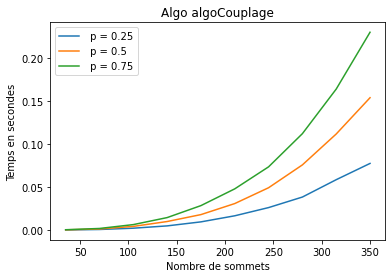

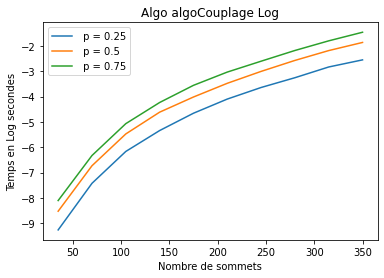

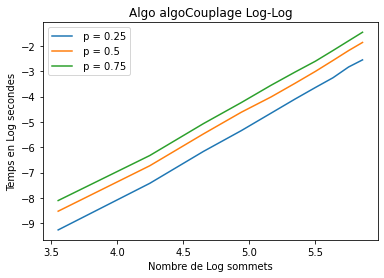

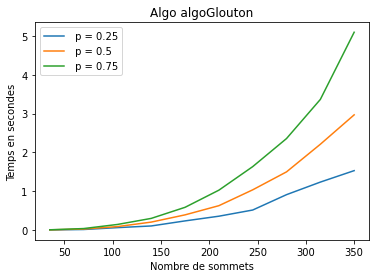

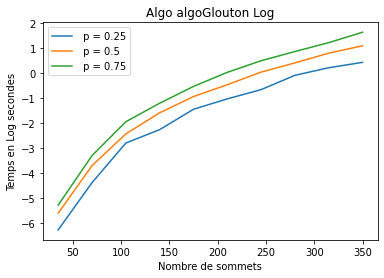

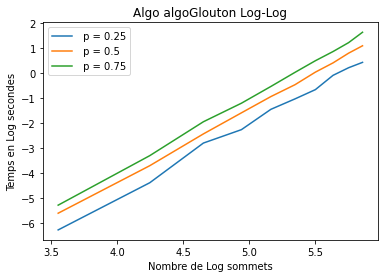

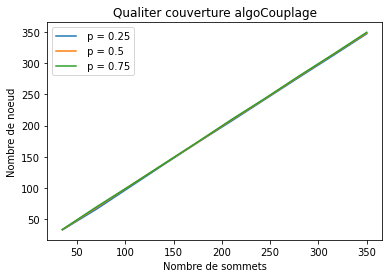

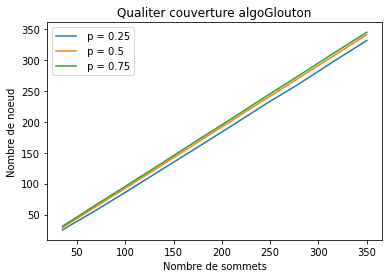

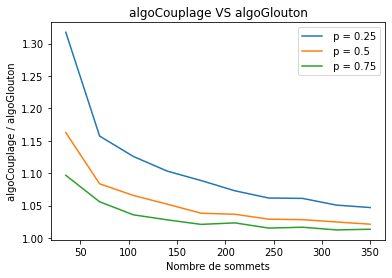

{'coeff_directeur': [('algoCouplage', [0.00024602155836801683, 0.000488838619656033, 0.0007307551399109856]), ('algoGlouton', [0.0048505594616844545, 0.009409809566679457, 0.016164605125548348])], 'coeff_directeur_log': [('algoCouplage', [0.021272176884528562, 0.021111623919120935, 0.021054515438730173]), ('algoGlouton', [0.02125635246410572, 0.02124155927799046, 0.021935967596071675])], 'coeff_directeur_log_log': [('algoCouplage', [2.9100925472915087, 2.8881284582086417, 2.8803158603690115]), ('algoGlouton', [2.907927722873787, 2.905903974157405, 3.0009009498874777])], 'nb_couverture': [('algoCouplage', array([ 33.2,  66.2, 102. , 137.8, 173. , 207.4, 242.4, 277.4, 312. ,
       347. ,  33.6,  68.6, 103.8, 138.8, 173.4, 209. , 243.4, 278.8,
       313.6, 348.2,  34. ,  69.8, 104. , 139. , 174. , 209.8, 244. ,
       279.6, 314. , 349.4])), ('algoGlouton', array([ 25.2,  57.2,  90.6, 124.9, 158.9, 193.3, 228.3, 261.4, 296.9,
       331.4,  28.9,  63.3,  97.4, 131.9, 167. , 201.6, 236.5

In [83]:
n_p,_,P = parametre_grille_search(35,351,35,0.25,0.76,0.25)
liste_fonction = [algoCouplage,algoGlouton]
nom_liste_fonction = ['algoCouplage','algoGlouton']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True}
dico_resultat = test_experimentale(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

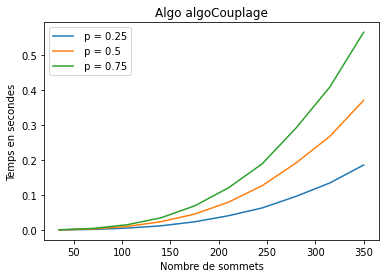

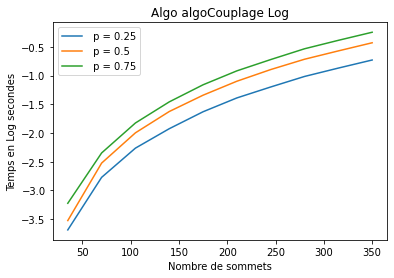

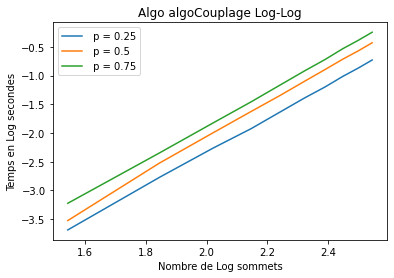

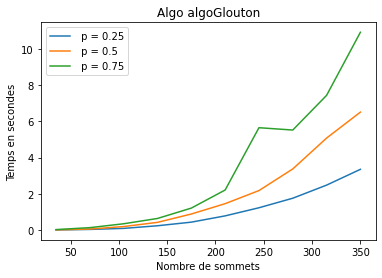

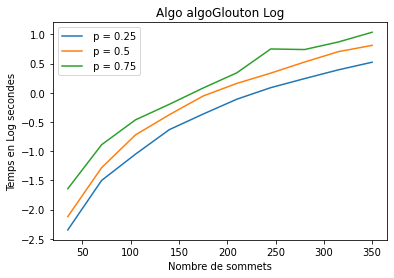

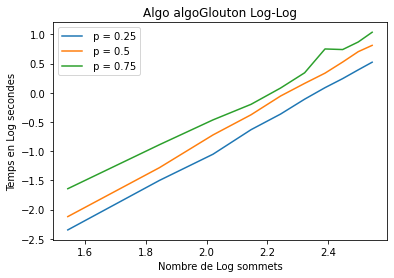

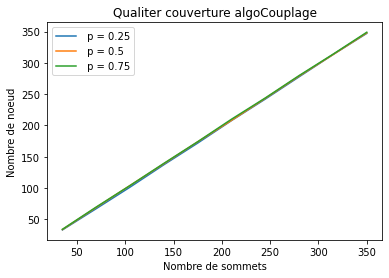

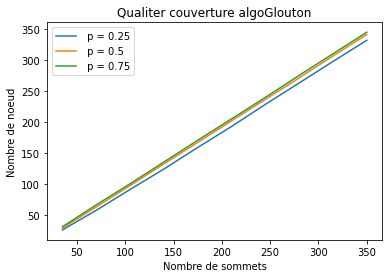

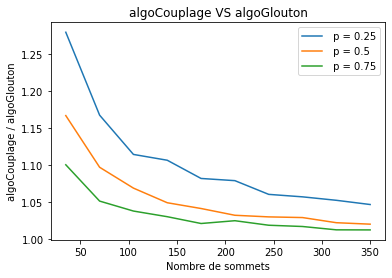

{'coeff_directeur': [('algoCouplage', [0.0005906474401080419, 0.001178575697399321, 0.0017964386561560254]), ('algoGlouton', [0.01061486145806691, 0.020627209194122798, 0.0345709076381865])], 'coeff_directeur_log': [('algoCouplage', [0.009386245970146758, 0.009822001205058791, 0.009448207771812501]), ('algoGlouton', [0.009116767915049442, 0.00930895695840693, 0.008505567370131282])], 'coeff_directeur_log_log': [('algoCouplage', [2.9566674805962285, 3.093930379593519, 2.9761854481209378]), ('algoGlouton', [2.8717818932405743, 2.932321441898183, 2.679253721591354])], 'nb_couverture': [('algoCouplage', array([ 33. ,  67. , 101.4, 137.2, 171.8, 207.8, 242.2, 277.8, 313.2,
       347.2,  33.6,  69. , 104. , 138.8, 173.8, 208.2, 243.4, 279. ,
       313.2, 348. ,  34. ,  69.6, 104. , 139.4, 174. , 210. , 244. ,
       279.8, 313.8, 349. ])), ('algoGlouton', array([ 25.8,  57.4,  91. , 124. , 158.8, 192.6, 228.4, 262.8, 297.6,
       331.7,  28.8,  62.9,  97.3, 132.3, 166.9, 201.7, 236.3, 271

In [70]:
n_p,_,P = parametre_grille_search(35,351,35,0.25,0.76,0.25)
liste_fonction = [algoCouplage,algoGlouton]
nom_liste_fonction = ['algoCouplage','algoGlouton']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True}
dico_resultat = test_experimentale(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

## TEST : BRANCHEMENT SIMPLE

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


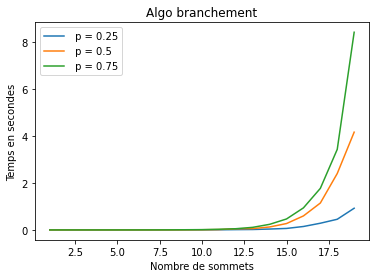

<ipython-input-94-1acfc325f114>:100: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


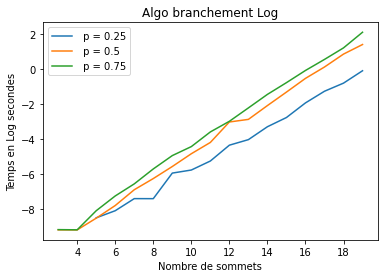

<ipython-input-94-1acfc325f114>:113: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


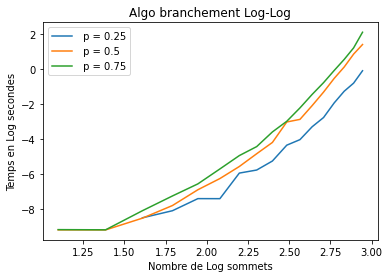

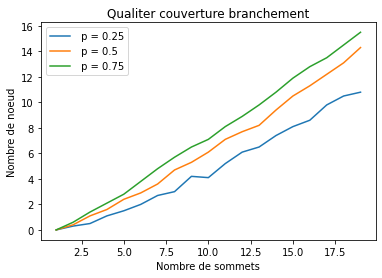

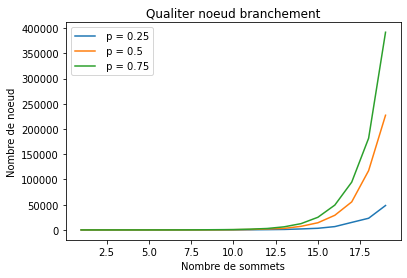

{'coeff_directeur': [('branchement', [0.05121332274542914, 0.23091018199920654, 0.4669182062149048])], 'coeff_directeur_log': [('branchement', [inf, inf, inf])], 'coeff_directeur_log_log': [('branchement', [inf, inf, inf])], 'nb_couverture': [('branchement', array([ 0. ,  0.3,  0.5,  1.1,  1.5,  2. ,  2.7,  3. ,  4.2,  4.1,  5.2,
        6.1,  6.5,  7.4,  8.1,  8.6,  9.8, 10.5, 10.8,  0. ,  0.4,  1.1,
        1.6,  2.4,  2.9,  3.6,  4.7,  5.3,  6.1,  7.1,  7.7,  8.2,  9.4,
       10.5, 11.3, 12.2, 13.1, 14.3,  0. ,  0.6,  1.4,  2.1,  2.8,  3.8,
        4.8,  5.7,  6.5,  7.1,  8.1,  8.9,  9.8, 10.8, 11.9, 12.8, 13.5,
       14.5, 15.5]))], 'nb_noeud': [('branchement', array([0.000000e+00, 6.000000e-01, 1.200000e+00, 3.400000e+00,
       6.200000e+00, 1.240000e+01, 2.320000e+01, 3.200000e+01,
       8.820000e+01, 1.196000e+02, 2.762000e+02, 5.636000e+02,
       9.150000e+02, 1.933400e+03, 3.247000e+03, 6.584600e+03,
       1.489260e+04, 2.313060e+04, 4.838400e+04, 0.000000e+00,
       8.

In [108]:
n_p,_,P = parametre_grille_search(1,20,1,0.25,0.76,0.25)
liste_fonction = [branchement_]
nom_liste_fonction = ['branchement']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


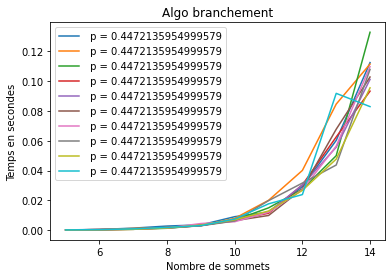

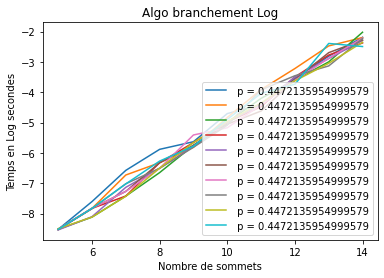

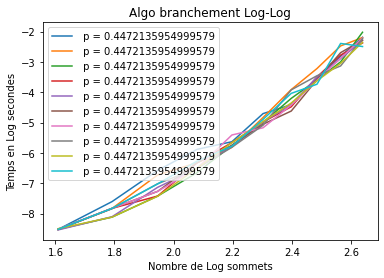

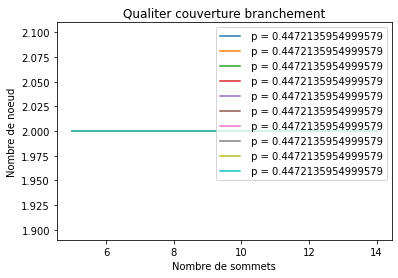

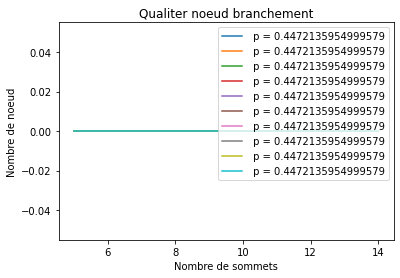

{'coeff_directeur': [('branchement', [0.012466637293497722, 0.012356008423699274, 0.014727242787679038, 0.010339509116278754, 0.011215331819322376, 0.011392045021057128, 0.012167697482638889, 0.011956387095981173, 0.010582198037041558, 0.009186487727695042])], 'coeff_directeur_log': [('branchement', [0.7037992693662249, 0.7027443668165957, 0.7221523509168801, 0.683052752459838, 0.6940479115333971, 0.6937757199995085, 0.6998680869170818, 0.6989656294852921, 0.6830704514568704, 0.6697067112645507])], 'coeff_directeur_log_log': [('branchement', [6.151975495603484, 6.1427544933688365, 6.3124015046701265, 5.970628243364717, 6.066737961199051, 6.064358709444354, 6.117612660703621, 6.109724195557592, 5.970782951959596, 5.853969244172153])], 'nb_couverture': [('branchement', array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2

In [139]:
n_p,_,P = parametre_grille_search_racine(5,15,1,0.5,0.51,0.5)
liste_fonction = [branchement_]
nom_liste_fonction = ['branchement']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

## TEST : AJOUT DE BORNES

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


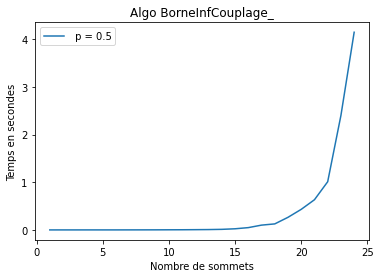

<ipython-input-94-1acfc325f114>:100: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


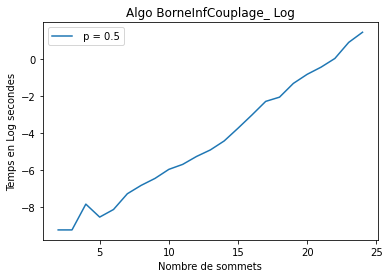

<ipython-input-94-1acfc325f114>:113: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


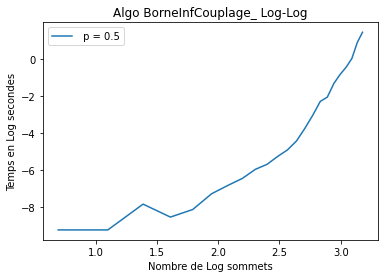

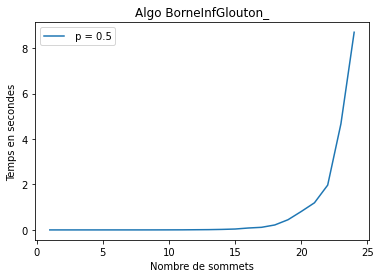

<ipython-input-94-1acfc325f114>:100: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


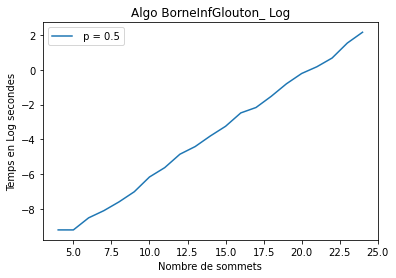

<ipython-input-94-1acfc325f114>:113: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


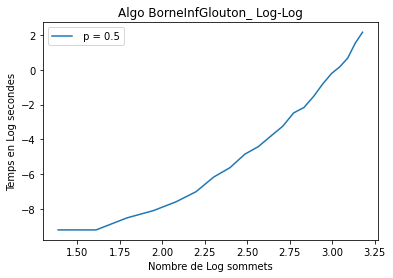

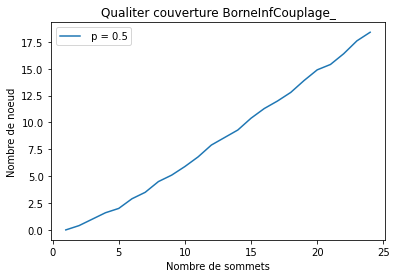

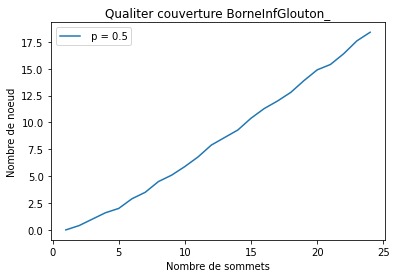

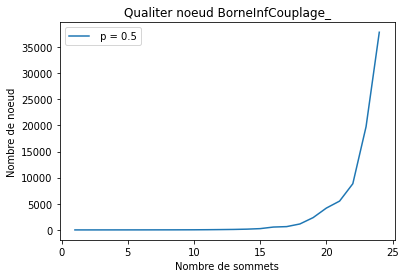

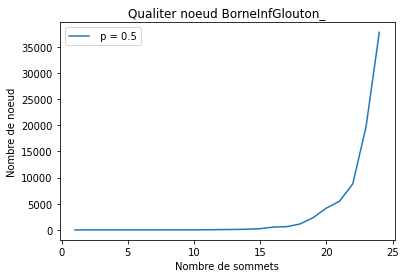

<ipython-input-94-1acfc325f114>:218: RuntimeWarning: invalid value encountered in true_divide
  graphique_comparaison(n_p, qualiter[i] / qualiter[j] ,P,'Nombre de sommets',nom_liste_fonction[i] + ' / ' + nom_liste_fonction[j], nom_liste_fonction[i] + ' VS ' + nom_liste_fonction[j])


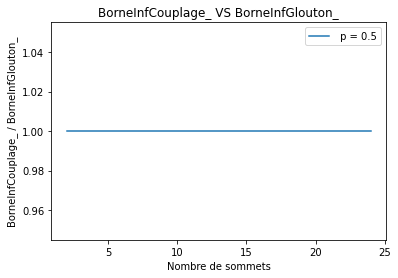

{'coeff_directeur': [('BorneInfCouplage_', [0.18043066107708475]), ('BorneInfGlouton_', [0.3783324573350989])], 'coeff_directeur_log': [('BorneInfCouplage_', [inf]), ('BorneInfGlouton_', [inf])], 'coeff_directeur_log_log': [('BorneInfCouplage_', [inf]), ('BorneInfGlouton_', [inf])], 'nb_couverture': [('BorneInfCouplage_', array([ 0. ,  0.4,  1. ,  1.6,  2. ,  2.9,  3.5,  4.5,  5.1,  5.9,  6.8,
        7.9,  8.6,  9.3, 10.4, 11.3, 12. , 12.8, 13.9, 14.9, 15.4, 16.4,
       17.6, 18.4])), ('BorneInfGlouton_', array([ 0. ,  0.4,  1. ,  1.6,  2. ,  2.9,  3.5,  4.5,  5.1,  5.9,  6.8,
        7.9,  8.6,  9.3, 10.4, 11.3, 12. , 12.8, 13.9, 14.9, 15.4, 16.4,
       17.6, 18.4]))], 'nb_noeud': [('BorneInfCouplage_', array([0.00000e+00, 8.00000e-01, 2.00000e+00, 3.60000e+00, 4.60000e+00,
       6.60000e+00, 1.00000e+01, 1.24000e+01, 1.80000e+01, 2.42000e+01,
       4.00000e+01, 6.30000e+01, 9.24000e+01, 1.45800e+02, 2.46600e+02,
       5.48200e+02, 6.31400e+02, 1.13860e+03, 2.35260e+03, 4.17800e

In [121]:
n_p,_,P = parametre_grille_search(1,25,1,0.5,0.51,0.5)
liste_fonction = [branchementBorneInfCouplage_,branchementBorneInfGlouton_]
nom_liste_fonction = ['BorneInfCouplage_','BorneInfGlouton_']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

## TEST : AMELIORATIONS BRANCHEMENT

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


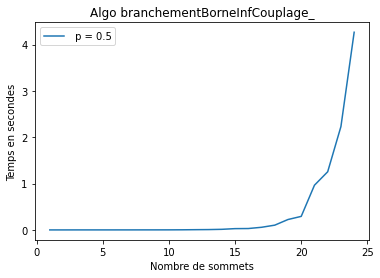

<ipython-input-94-1acfc325f114>:100: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


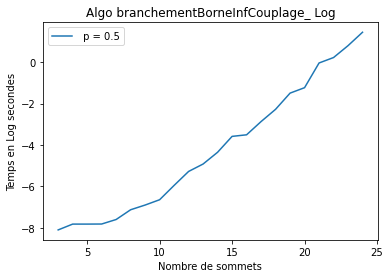

<ipython-input-94-1acfc325f114>:113: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


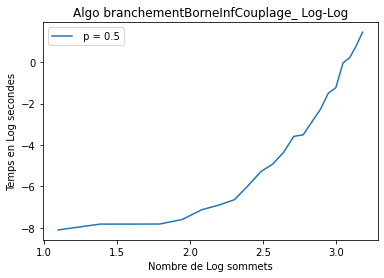

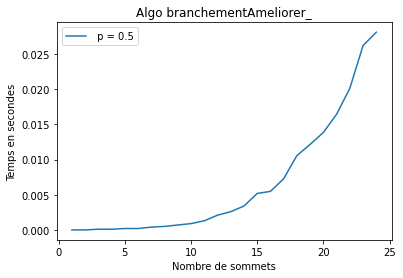

<ipython-input-94-1acfc325f114>:100: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


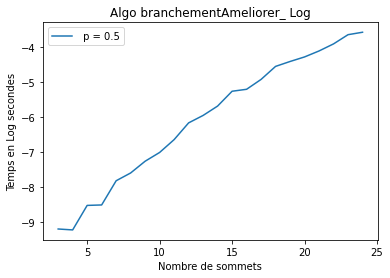

<ipython-input-94-1acfc325f114>:113: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


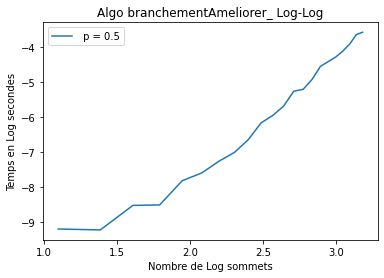

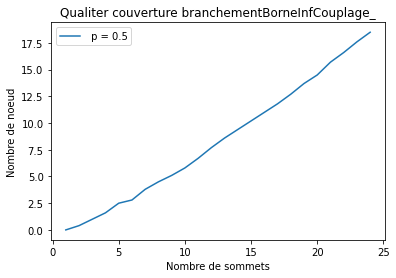

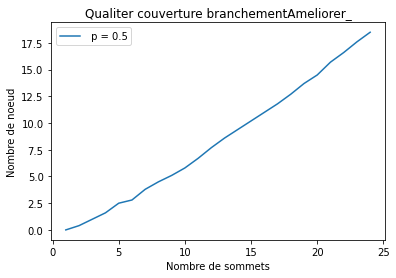

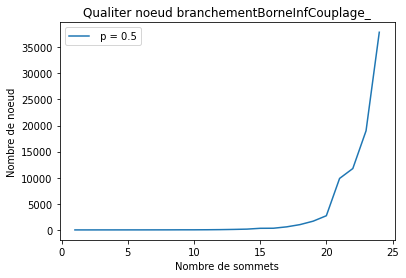

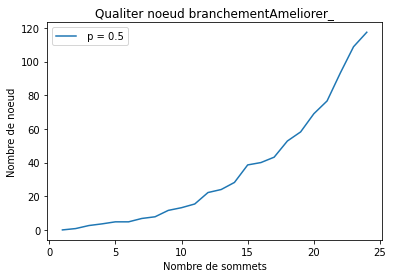

<ipython-input-94-1acfc325f114>:218: RuntimeWarning: invalid value encountered in true_divide
  graphique_comparaison(n_p, qualiter[i] / qualiter[j] ,P,'Nombre de sommets',nom_liste_fonction[i] + ' / ' + nom_liste_fonction[j], nom_liste_fonction[i] + ' VS ' + nom_liste_fonction[j])


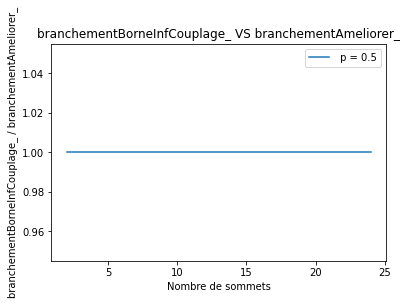

{'coeff_directeur': [('branchementBorneInfCouplage_', [0.18545713632003122]), ('branchementAmeliorer_', [0.001222923527593198])], 'coeff_directeur_log': [('branchementBorneInfCouplage_', [inf]), ('branchementAmeliorer_', [inf])], 'coeff_directeur_log_log': [('branchementBorneInfCouplage_', [inf]), ('branchementAmeliorer_', [inf])], 'nb_couverture': [('branchementBorneInfCouplage_', array([ 0. ,  0.4,  1. ,  1.6,  2.5,  2.8,  3.8,  4.5,  5.1,  5.8,  6.7,
        7.7,  8.6,  9.4, 10.2, 11. , 11.8, 12.7, 13.7, 14.5, 15.7, 16.6,
       17.6, 18.5])), ('branchementAmeliorer_', array([ 0. ,  0.4,  1. ,  1.6,  2.5,  2.8,  3.8,  4.5,  5.1,  5.8,  6.7,
        7.7,  8.6,  9.4, 10.2, 11. , 11.8, 12.7, 13.7, 14.5, 15.7, 16.6,
       17.6, 18.5]))], 'nb_noeud': [('branchementBorneInfCouplage_', array([0.00000e+00, 8.00000e-01, 2.60000e+00, 3.80000e+00, 5.20000e+00,
       5.80000e+00, 9.20000e+00, 1.18000e+01, 1.92000e+01, 2.08000e+01,
       3.26000e+01, 5.50000e+01, 9.54000e+01, 1.51200e+02, 3.0

In [130]:
n_p,_,P = parametre_grille_search(1,25,1,0.5,0.51,0.5)
liste_fonction = [branchementBorneInfCouplage_,branchementAmeliorer_]
nom_liste_fonction = ['branchementBorneInfCouplage_','branchementAmeliorer_']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


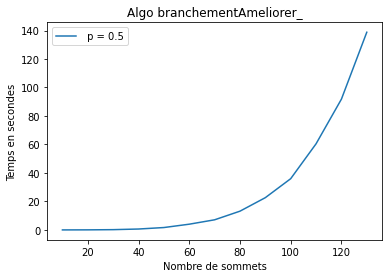

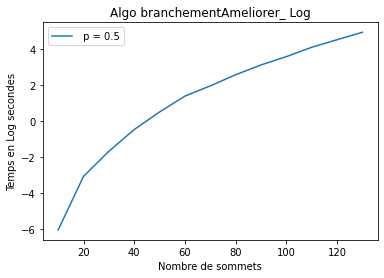

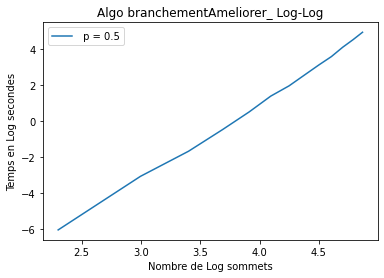

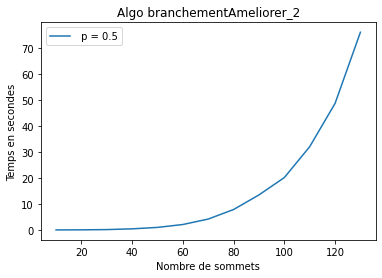

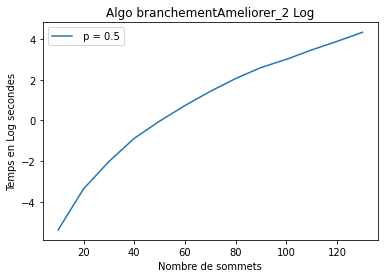

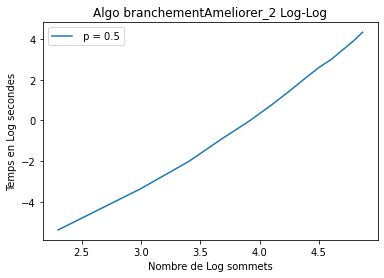

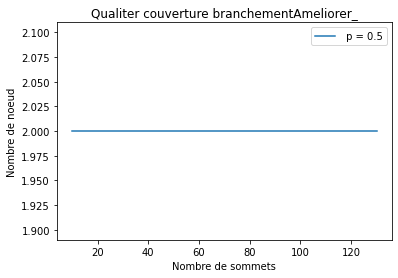

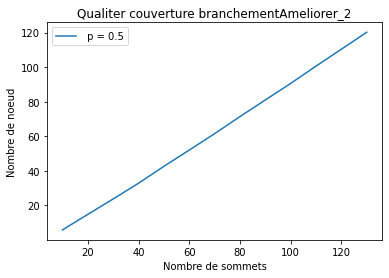

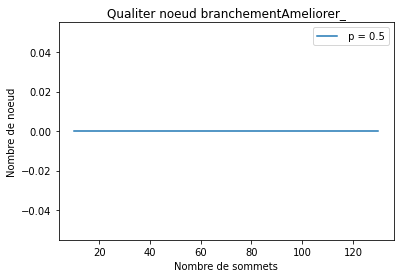

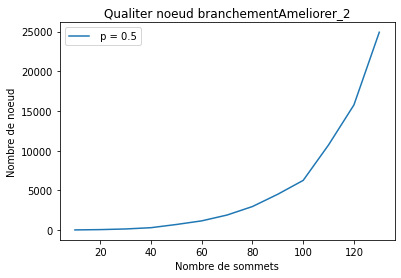

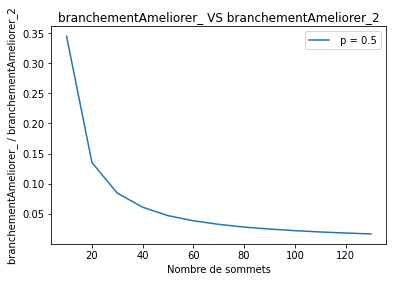

{'coeff_directeur': [('branchementAmeliorer_', [1.1565975358088811]), ('branchementAmeliorer_2', [0.6334053335587183])], 'coeff_directeur_log': [('branchementAmeliorer_', [0.09136948142818782]), ('branchementAmeliorer_2', [0.08084463440076654])], 'coeff_directeur_log_log': [('branchementAmeliorer_', [4.274680020284556]), ('branchementAmeliorer_2', [3.78227979428536])], 'nb_couverture': [('branchementAmeliorer_', array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])), ('branchementAmeliorer_2', array([  5.8,  14.8,  23.7,  32.8,  42.6,  52. ,  61.5,  71.4,  81. ,
        90.6, 100.6, 110.4, 120.2]))], 'nb_noeud': [('branchementAmeliorer_', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])), ('branchementAmeliorer_2', array([1.52000e+01, 5.38000e+01, 1.34800e+02, 2.96000e+02, 6.99200e+02,
       1.15680e+03, 1.89160e+03, 2.96220e+03, 4.51260e+03, 6.25640e+03,
       1.07246e+04, 1.57622e+04, 2.49222e+04]))], 'execution': array([[2.40225792e-03, 4.68571424e-02, 1.88729000e

In [42]:
n_p,_,P = parametre_grille_search(10,131,10,0.5,0.51,0.5)
liste_fonction = [branchementAmeliorer_,branchementAmeliorer_2]
nom_liste_fonction = ['branchementAmeliorer_','branchementAmeliorer_2']
dico_bool = {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


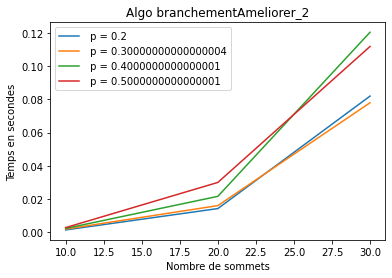

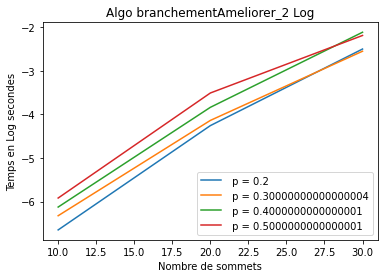

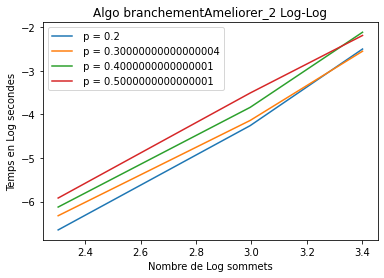

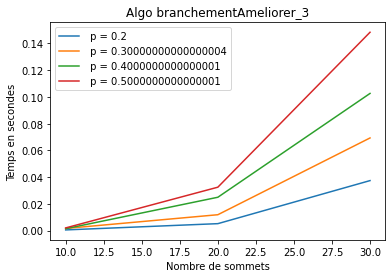

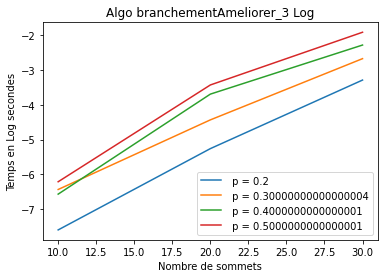

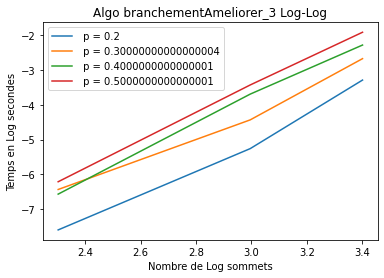

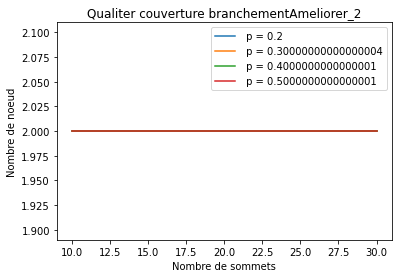

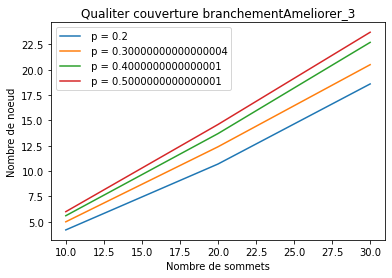

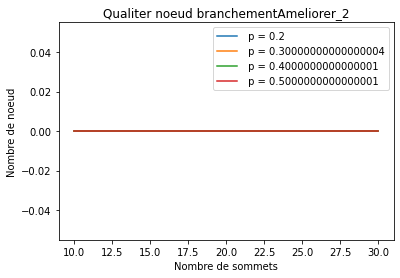

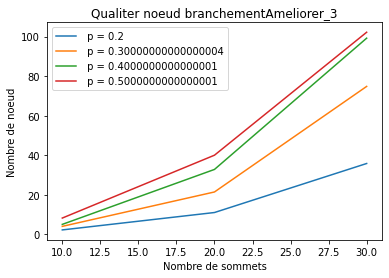

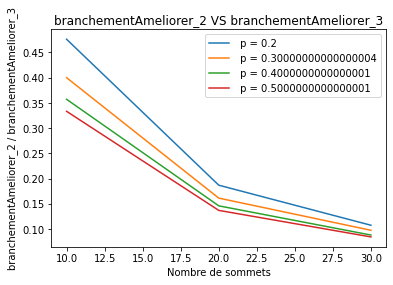

{'coeff_directeur': [('branchementAmeliorer_2', [0.004034181833267212, 0.003808691501617432, 0.005914448499679566, 0.005460406541824341]), ('branchementAmeliorer_3', [0.0018451225757598875, 0.003385968208312988, 0.0050614762306213385, 0.007320435047149658])], 'coeff_directeur_log': [('branchementAmeliorer_2', [0.20734147471678482, 0.18855920861364928, 0.20038256245790423, 0.18635171369872872]), ('branchementAmeliorer_3', [0.21597883850878427, 0.18856493941133756, 0.2148758759978479, 0.21547425908143092])], 'coeff_directeur_log_log': [('branchementAmeliorer_2', [3.774606871877484, 3.4326797644371325, 3.647921373623734, 3.3924927951543333]), ('branchementAmeliorer_3', [3.931848218639969, 3.4327840923742476, 3.9117690237809066, 3.92266245888545])], 'nb_couverture': [('branchementAmeliorer_2', array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])), ('branchementAmeliorer_3', array([ 4.2, 10.7, 18.6,  5. , 12.4, 20.5,  5.6, 13.7, 22.7,  6. , 14.6,
       23.7]))], 'nb_noeud': [('brancheme

In [77]:
n_p,_,P = parametre_grille_search(10,40,10,0.2,0.6,0.1)
liste_fonction = [branchementAmeliorer_2,branchementAmeliorer_3]
nom_liste_fonction = ['branchementAmeliorer_2','branchementAmeliorer_3']
dico_bool =  {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

## TEST : COUPLAGE VS BRANCHEMENT AMELIORE  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


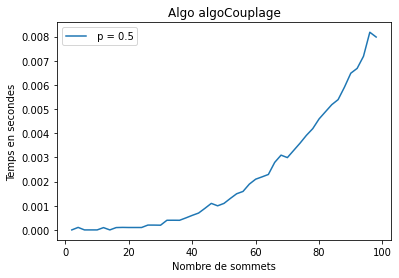

C:\Users\ethan\AppData\Local\Temp/ipykernel_26088/1821871673.py:104: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


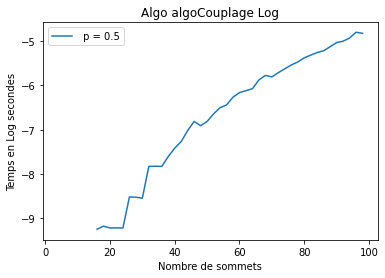

C:\Users\ethan\AppData\Local\Temp/ipykernel_26088/1821871673.py:117: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


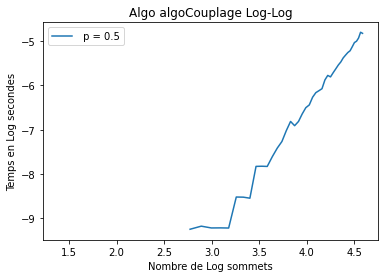

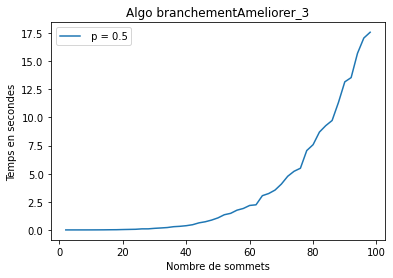

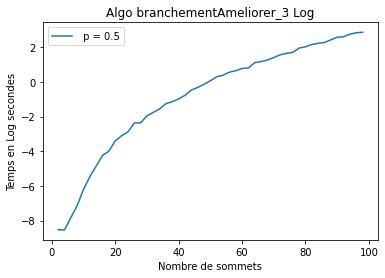

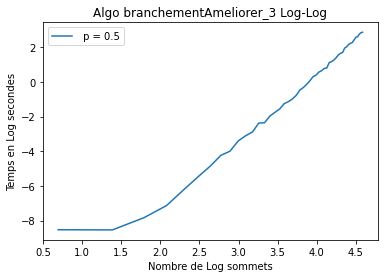

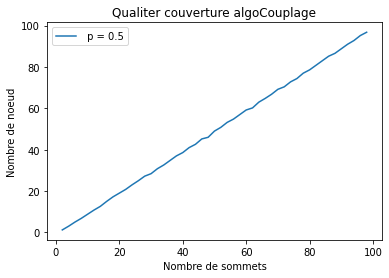

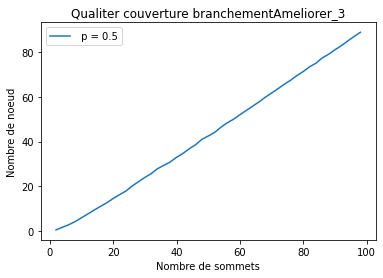

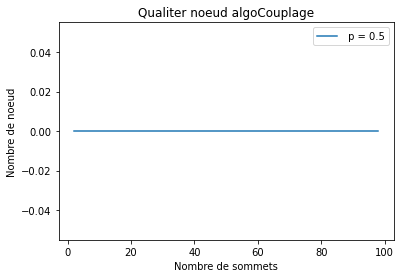

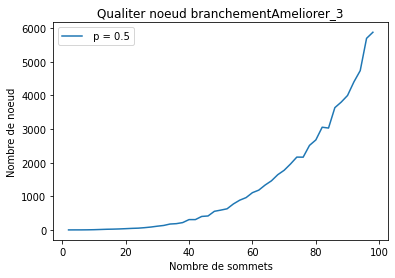

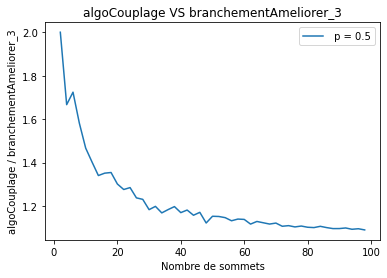

{'coeff_directeur': [('algoCouplage', [8.311420679092407e-05]), ('branchementAmeliorer_3', [0.18310028289755184])], 'coeff_directeur_log': [('algoCouplage', [inf]), ('branchementAmeliorer_3', [0.1186583619037359])], 'coeff_directeur_log_log': [('algoCouplage', [inf]), ('branchementAmeliorer_3', [2.9269601035507127])], 'nb_couverture': [('algoCouplage', array([ 1.2,  3. ,  5. ,  6.8,  8.8, 10.8, 12.6, 15. , 17.2, 19. , 20.8,
       23. , 25. , 27.2, 28.4, 30.8, 32.6, 34.8, 37. , 38.6, 41. , 42.6,
       45.2, 46. , 49. , 50.8, 53.2, 54.8, 57. , 59.2, 60.2, 63. , 64.8,
       66.8, 69.2, 70.4, 72.8, 74.4, 77. , 78.6, 80.8, 83. , 85.2, 86.6,
       88.8, 91. , 92.8, 95.2, 96.8])), ('branchementAmeliorer_3', array([ 0.6,  1.8,  2.9,  4.3,  6. ,  7.7,  9.4, 11.1, 12.7, 14.6, 16.3,
       17.9, 20.2, 22.1, 24. , 25.7, 27.9, 29.4, 30.9, 33. , 34.7, 36.8,
       38.6, 41. , 42.5, 44.1, 46.4, 48.4, 50. , 52. , 53.9, 55.8, 57.7,
       59.8, 61.7, 63.6, 65.6, 67.4, 69.5, 71.3, 73.4, 75. , 77.4, 

In [43]:
n_p,_,P = parametre_grille_search(2,100,2,0.5,0.51,0.5)
liste_fonction = [algoCouplage,branchementAmeliorer_3]
nom_liste_fonction = ['algoCouplage','branchementAmeliorer_3']
dico_bool =  {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

## TEST : GLOUTON VS BRANCHEMENT AMELIORE  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


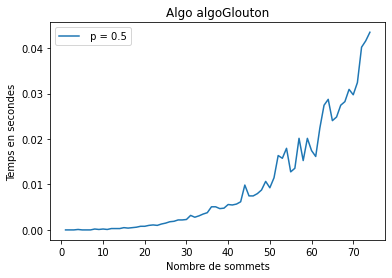

<ipython-input-134-17e3a24c1c8e>:104: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


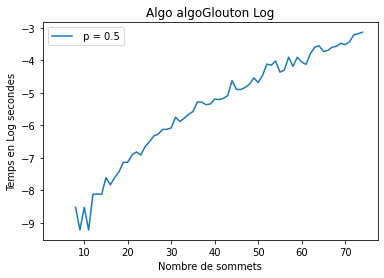

<ipython-input-134-17e3a24c1c8e>:117: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


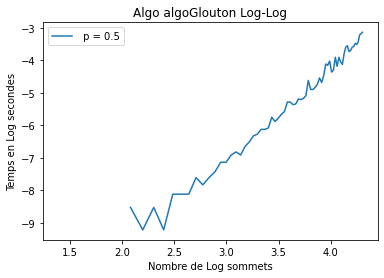

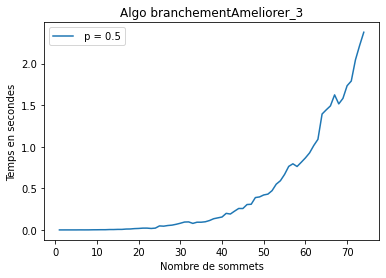

<ipython-input-134-17e3a24c1c8e>:104: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


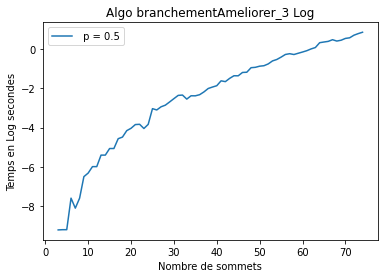

<ipython-input-134-17e3a24c1c8e>:117: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.array(resultat_temps))


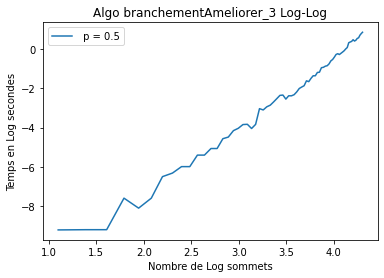

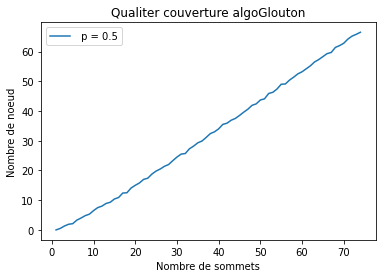

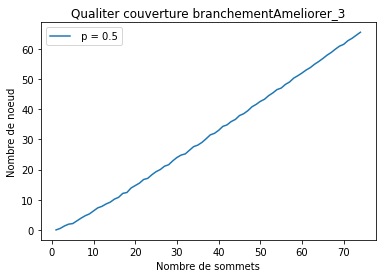

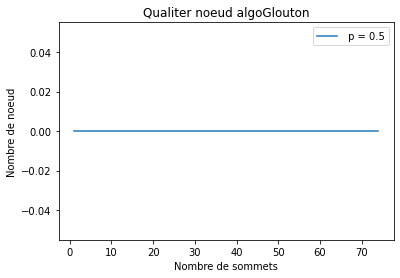

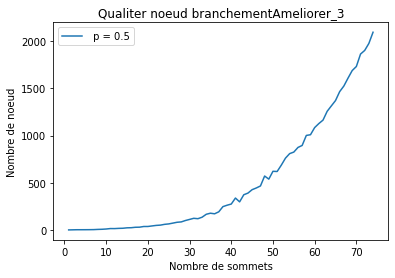

<ipython-input-134-17e3a24c1c8e>:222: RuntimeWarning: invalid value encountered in true_divide
  graphique_comparaison(n_p, qualiter[i] / qualiter[j] ,P,'Nombre de sommets',nom_liste_fonction[i] + ' / ' + nom_liste_fonction[j], nom_liste_fonction[i] + ' VS ' + nom_liste_fonction[j])


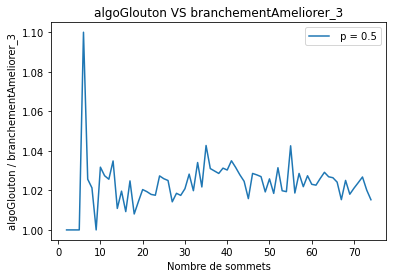

{'coeff_directeur': [('algoGlouton', [0.0005956571396083047]), ('branchementAmeliorer_3', [0.032552706052179206])], 'coeff_directeur_log': [('algoGlouton', [inf]), ('branchementAmeliorer_3', [inf])], 'coeff_directeur_log_log': [('algoGlouton', [inf]), ('branchementAmeliorer_3', [inf])], 'nb_couverture': [('algoGlouton', array([ 0. ,  0.5,  1.3,  1.9,  2.1,  3.3,  4. ,  4.8,  5.3,  6.5,  7.5,
        8. ,  8.9,  9.3, 10.4, 10.9, 12.4, 12.5, 14.1, 15. , 15.8, 17. ,
       17.4, 18.8, 19.8, 20.5, 21.4, 22. , 23.3, 24.5, 25.5, 25.7, 27.3,
       28.2, 29.3, 29.9, 31.1, 32.4, 33. , 34. , 35.5, 35.9, 36.9, 37.5,
       38.5, 39.6, 40.6, 41.9, 42.4, 43.7, 44.1, 45.9, 46.3, 47.4, 49. ,
       49.1, 50.4, 51.4, 52.5, 53.2, 54.2, 55.2, 56.5, 57.3, 58.3, 59.3,
       59.7, 61.4, 62. , 62.8, 64.2, 65.2, 65.8, 66.5])), ('branchementAmeliorer_3', array([ 0. ,  0.5,  1.3,  1.9,  2.1,  3. ,  3.9,  4.7,  5.3,  6.3,  7.3,
        7.8,  8.6,  9.2, 10.2, 10.8, 12.1, 12.4, 13.9, 14.7, 15.5, 16.7,
       17

In [138]:
n_p,_,P = parametre_grille_search(1,75,1,0.5,0.51,0.5)
liste_fonction = [algoGlouton,branchementAmeliorer_3]
nom_liste_fonction = ['algoGlouton','branchementAmeliorer_3']
dico_bool =  {'execution':True,'nb_couverture':True,'rapport':True, 'nb_noeud' : True}
dico_resultat = test_experimentale2(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

# TEST SOUTENANCE 

 les aretes du graphe : 
[(0, 6), (0, 11), (0, 14), (0, 17), (0, 19), (1, 8), (1, 9), (1, 10), (1, 14), (2, 14), (2, 17), (3, 5), (3, 9), (3, 18), (3, 19), (4, 15), (4, 16), (4, 19), (5, 13), (6, 14), (6, 18), (6, 19), (7, 13), (7, 19), (8, 9), (9, 12), (9, 17), (9, 19), (10, 11), (10, 14), (11, 12), (11, 15), (11, 19), (12, 15), (13, 14), (13, 15), (14, 15), (18, 19)]
-----------------------------------------------------------------------------------------------------------
 La couverture renvoyé par l'algo de couplage est le suivant : 
 [0, 6, 1, 8, 2, 14, 3, 5, 4, 15, 7, 13, 9, 12, 10, 11, 18, 19] 
 de taille : 18
-----------------------------------------------------------------------------------------------------------
 La couverture renvoyé par l'algo glouton est le suivant : 
 [19, 14, 9, 11, 13, 0, 1, 3, 4, 2, 6, 12] 
 de taille : 12
-----------------------------------------------------------------------------------------------------------
 La couverture renvoyé par l'algo branc

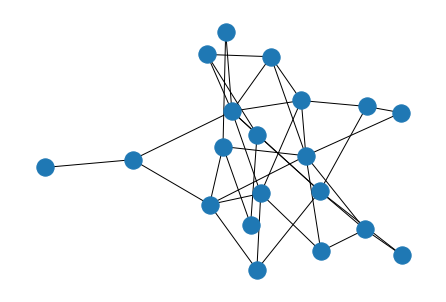

In [76]:
#TEST 
# on test toute les fonctions sur une instance 
f = './exempleinstance2.txt'
graphe = fichier_to_graphe(f)
#graphe = genererGrapheSansSommetVide(genererGraphe(12,0.3))

graphe = genererGrapheSansSommetVide(graphe)
dessineGraphe(graphe)

#---------- ALGOS APPROCHES ----------#
print("-----------------------------------------------------------------------------------------------------------")
couverture = algoCouplage(graphe)
print(f" La couverture renvoyé par l'algo de couplage est le suivant : \n {couverture} \n de taille : {len(couverture)}")

print("-----------------------------------------------------------------------------------------------------------")

couverture = algoGlouton(graphe)
print(f" La couverture renvoyé par l'algo glouton est le suivant : \n {couverture} \n de taille : {len(couverture)}")

print("-----------------------------------------------------------------------------------------------------------")
#---------- ALGOS EXACTS ----------#

couverture , nb_noeud = branchement_(graphe)
print(f" La couverture renvoyé par l'algo branchement simple est le suivant : \n {couverture} \n de taille : {len(couverture)} \n avec {nb_noeud} noeuds generes")

print("-----------------------------------------------------------------------------------------------------------")

couverture , nb_noeud = branchementBorneInfCouplage_(graphe)
print(f" La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Couplage est le suivant : \n {couverture} \n de taille : {len(couverture)} \n avec {nb_noeud} noeuds generes")

print("-----------------------------------------------------------------------------------------------------------")

couverture , nb_noeud = branchementBorneInfGlouton_(graphe)
print(f" La couverture renvoyé par l'algo branchement avec la methode des bornes suivant l'algo Glouton est le suivant : \n {couverture} \n de taille : {len(couverture)} \n avec {nb_noeud} noeuds generes")

print("-----------------------------------------------------------------------------------------------------------")

couverture , nb_noeud = branchementAmeliorer_(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 1 est le suivant : \n {couverture} \n de taille : {len(couverture)} \n avec {nb_noeud} noeuds generes")

print("-----------------------------------------------------------------------------------------------------------")

couverture , nb_noeud = branchementAmeliorer_2(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 2 avec le degre max est le suivant : \n {couverture} \n de taille : {len(couverture)} \n avec {nb_noeud} noeuds generes")

print("-----------------------------------------------------------------------------------------------------------")

couverture , nb_noeud = branchementAmeliorer_3(graphe)
print(f" La couverture renvoyé par l'algo branchement ameliore 3 avec le degre max est le suivant : \n {couverture} \n de taille : {len(couverture)} \n avec {nb_noeud} noeuds generes")